In [139]:
import importlib
import torch
import itertools
import numpy as np
from torchvision import transforms
from utils import stats, img, shift, losses

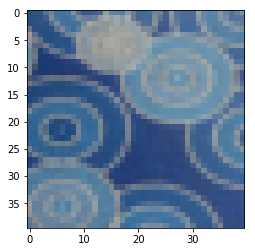

In [140]:
transform = transforms.Compose([
    transforms.RandomResizedCrop(40),
    transforms.ToTensor(),
])

example_texture = img.image_loader("data/original/rings-2.jpg", transform)
img.show_image(example_texture)

torch.Size([1, 3, 40, 40])


tensor(176.5714, device='cuda:0', grad_fn=<AddBackward>)

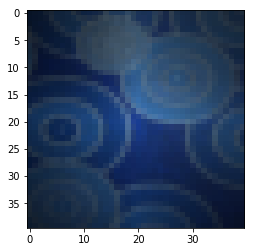

In [145]:
importlib.reload(losses)
# x = img.random_image(1, 40)
y = img.random_image(1, 40)
target = losses.deep_correlation_matrix(example_texture)
print(target.size())
img.show_image(target)
losses.deep_correlation_loss([target], [y])